# Proyecto Final : Airline Passenger Satisfaction

# Parte 1: Análisis y pre-procesamiento de los datos

#### Realizado por Javier Gómez Moraleda y Unai Piris Ibañez

Este proyecto consiste en aplicar las técnicas y conocimientos adquiridos en la asignatura de Aprendizaje Automático y Big Data sobre un dataset de Kaggle.

El dataset que hemos escogido para el desarrollo del proyecto consiste en 104k ejemplos de entrenamiento y 26k ejemplos de test, que recogen la satisfacción (satisfechos o neutral/no satisfechos) de los pasajeros que realizaron un vuelo en una aerolínea. Cada ejemplo tiene un total de 24 variables y el objetivo es determinar la satisfacción en función de las mismas.

El dataset se encuentra disponible a través del siguiente enlace: https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction

In [75]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from pandas.io.parsers import read_csv
from IPython.display import display

## Visualización de los datos

In [80]:
def load_csv(file_name):
    # CSV to DataFrame
    data = pd.DataFrame(read_csv(file_name))
    # Remove number and id column
    data.drop(data.columns[0], axis=1, inplace=True)
    data.drop(data.columns[0], axis=1, inplace=True)
    return data

In [81]:
train = load_csv('data/train.csv')
display(train)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,3,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,3,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,5,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


In [82]:
test = load_csv('data/test.csv')
display(test)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,...,2,2,2,2,4,2,4,0,20.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,Male,disloyal Customer,34,Business travel,Business,526,3,3,3,1,...,4,3,2,4,4,5,4,0,0.0,neutral or dissatisfied
25972,Male,Loyal Customer,23,Business travel,Business,646,4,4,4,4,...,4,4,5,5,5,5,4,0,0.0,satisfied
25973,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,1,5,...,2,4,3,4,5,4,2,0,0.0,neutral or dissatisfied
25974,Male,Loyal Customer,14,Business travel,Business,1127,3,3,3,3,...,4,3,2,5,4,5,4,0,0.0,satisfied


## Eliminación de valores nulos

In [88]:
# Comprobación de valores nulos en el conjunto de entrenamiento
train.isnull().sum()

<class 'pandas.core.series.Series'>
Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
satisfaction                          0
dtype: int64


In [89]:
# Comprobación de valores nulos en el conjunto de test
test.isnull().sum()

Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
satisfaction                          0
dtype: int64

In [90]:
# Eliminamos nulos
train = train.dropna()
test = test.dropna()

## Variables numéricas

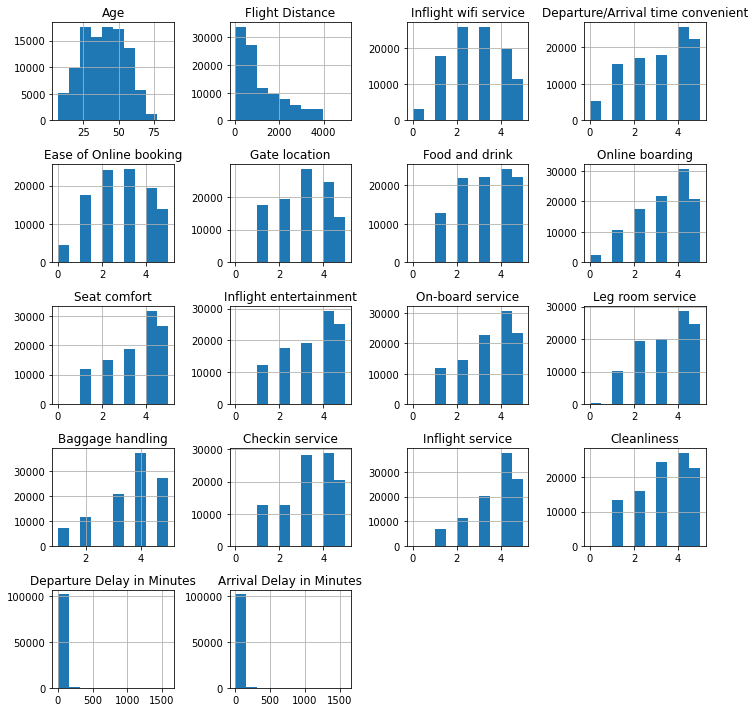

In [93]:
train.hist(figsize=(10,10))
plt.tight_layout()

## Variables no numéricas

In [113]:
def plot_column(column_name):
    plt.figure(figsize=(3, 3)) 
    train[column_name].value_counts().plot.bar()
    plt.show()

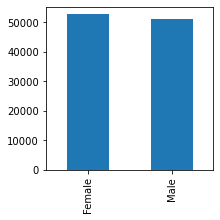

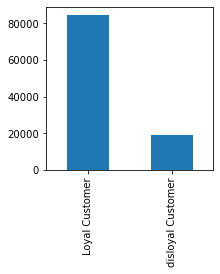

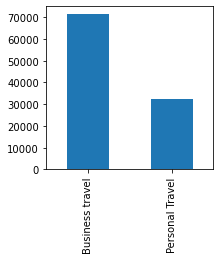

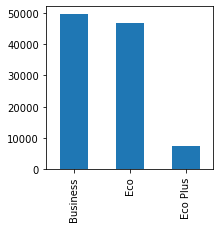

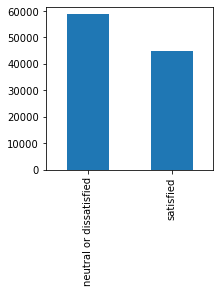

In [117]:
plot_column('Gender')
plot_column('Customer Type')
plot_column('Type of Travel')
plot_column('Class')
plot_column('satisfaction')